# Modeling Stock Volitality

In [15]:
!pip install arch
!pip install pandas_datareader
!pip install yfinance

# Import Libraries

In [16]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# DIS Volatility

In [20]:
ticker_symbol = 'DIS'
start_date = datetime(2015, 1, 1)
end_date = datetime(2020, 6, 10)

In [28]:
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [29]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DIS,DIS,DIS,DIS,DIS,DIS
Date,,,,,,
2015-01-02,86.310020,93.750000,95.279999,92.849998,94.910004,5865400
2015-01-05,85.048744,92.379997,93.349998,91.779999,93.279999,7789400
2015-01-06,84.597626,91.889999,93.190002,91.160004,92.570000,6793100
2015-01-07,85.463028,92.830002,93.150002,92.099998,92.720001,6589500
2015-01-08,86.346840,93.790001,94.300003,93.559998,93.870003,7579400


In [30]:
data['Returns'] = data['Close'].pct_change()
data

Price,Adj Close,Close,High,Low,Open,Volume,Returns
Ticker,DIS,DIS,DIS,DIS,DIS,DIS,
Date,,,,,,,
2015-01-02,86.310020,93.750000,95.279999,92.849998,94.910004,5865400,NaN
2015-01-05,85.048744,92.379997,93.349998,91.779999,93.279999,7789400,-0.014613
2015-01-06,84.597626,91.889999,93.190002,91.160004,92.570000,6793100,-0.005304
2015-01-07,85.463028,92.830002,93.150002,92.099998,92.720001,6589500,0.010230
2015-01-08,86.346840,93.790001,94.300003,93.559998,93.870003,7579400,0.010341
...,...,...,...,...,...,...,...
2020-06-03,120.689049,122.180000,122.449997,119.320000,119.989998,12584300,0.028884
2020-06-04,122.180626,123.690002,124.500000,121.849998,121.949997,14195100,0.012359


In [35]:
# Drop Nan
data.dropna(inplace=True)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Returns
Ticker,DIS,DIS,DIS,DIS,DIS,DIS,
Date,,,,,,,
2015-01-05,85.048744,92.379997,93.349998,91.779999,93.279999,7789400,-0.014613
2015-01-06,84.597626,91.889999,93.190002,91.160004,92.570000,6793100,-0.005304
2015-01-07,85.463028,92.830002,93.150002,92.099998,92.720001,6589500,0.010230
2015-01-08,86.346840,93.790001,94.300003,93.559998,93.870003,7579400,0.010341
2015-01-09,86.770332,94.250000,95.269997,93.989998,94.050003,8621300,0.004905


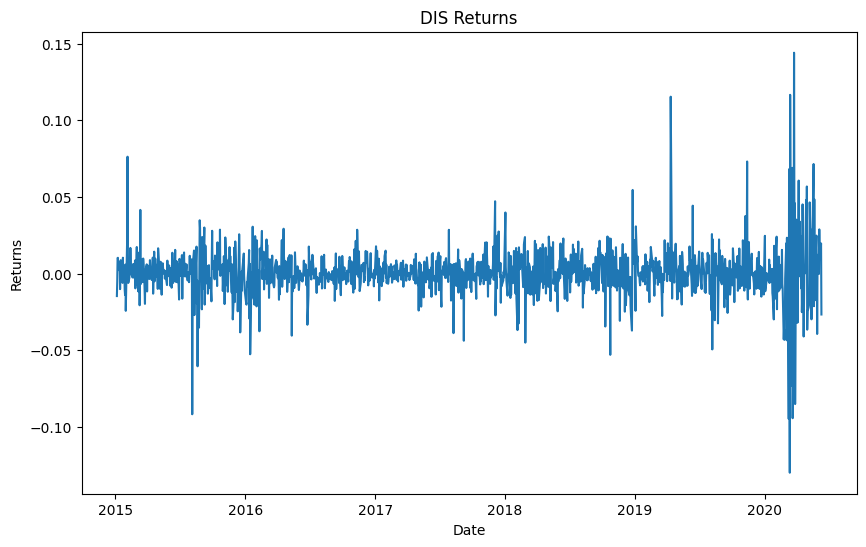

In [36]:
# plot returns
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'])
plt.title(f'{ticker_symbol} Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

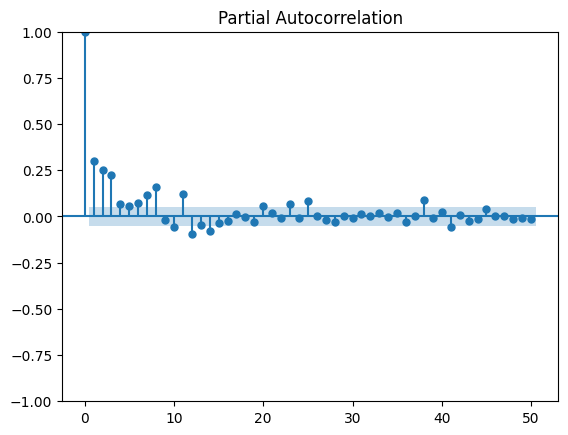

In [38]:
# Plotting PACF to determine the order of the GARCH process
plot_pacf(data['Returns']**2, lags=50)
plt.show()

# Squaring the returns is common when examining volatility because it amplifies
# larger changes (either positive or negative) in price, which are important
# when modeling volatility. It focuses on the magnitude of the changes, rather
# than their direction.

# Fitting a GARCH(3, *3*)

In [40]:
model = arch_model(data['Returns']*100, vol='GARCH', p=3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 226817739842.71448
Iteration:      2,   Func. Count:     22,   Neg. LLF: 975679599.6168538
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.6366984020387
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2484.4387391086784
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2321.37485842304
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2323.9553762024907
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2392.948693067593
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2382.0384560349225
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2297.299869215047
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2297.3150569281315
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2297.1717761461314
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2297.1586277305996
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2297.143636016665
Iteration:     14,   Func. Count:    139,   Neg. LLF: 229

In [42]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2297.14
Distribution:                  Normal   AIC:                           4610.28
Method:            Maximum Likelihood   BIC:                           4652.04
                                        No. Observations:                 1367
Date:                Wed, Jan 01 2025   Df Residuals:                     1366
Time:                        22:56:48   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.7112e-03  4.330e-02     -0.155      0.

In [ ]:
# the omega (intercept or constant) and alphas - which are the coefs for the lagged
# version of the time series (AR) - are significant. while the betas which are the
# coef of the lagged versions for the volatility (St dev) of the time series are
# not significant

# Reducing the model to a GARCH (3, 0) i.e. ARCH(3)

In [43]:
reduced_model = arch_model(data['Returns']*100, vol='ARCH', p=3, q=0)
reduced_model_fit = reduced_model.fit()
print(reduced_model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6820.529784220447
Iteration:      2,   Func. Count:     16,   Neg. LLF: 490822.82552961993
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2437.7973874084837
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2340.059289905271
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2323.080744923583
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2407.3153661697506
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2341.1258308978813
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.8617839055696
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2312.2985544032945
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2312.2985372964476
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2312.2985372964854
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2312.2985372964476
            Iterations: 11
            Function evaluations: 78
            Gradient evalua

# Rolling Predictions (day by day)

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
rolling_predictions = []
test_size = 365 # predicting for the whole year

for i in range(test_size):
    train = data['Returns'][:-(test_size-i)]
    model = arch_model(train*100, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions,
                                index=data['Returns'].index[-365:])

*   `for i in range(test_size):`: This line starts a `for` loop that will iterate `test_size` (365) times. Each iteration represents a single day's prediction in our rolling window. `i` will be our loop variable.
*   `train = data['Returns'][:-(test_size-i)]`: This is a crucial part. In each iteration, it creates a training set called `train` from the `data['Returns']` time series.
    *   `data['Returns'][:-(test_size-i)]` slices the `data['Returns']` Series.
    *   `-(test_size - i)` dynamically adjusts the slicing point.
    *   For example, when `i` is 0: The slice is `[:-(365 - 0)]` which is `[:-365]`. The last 365 values are excluded.
    *   When `i` is 1: the slice is `[:-(365-1)]` which is `[:-364]`. The last 364 are excluded.
    *   This way as `i` increases, the slice point gets closer to the end of the series. It effectively creates a rolling window of training data. Each loop, the `train` series grows by one observation.
*   `model = arch_model(train*100, p=3, q=0)`:  This line initializes an ARCH model.
    *   `arch_model`: This is a function from the `arch` library for defining ARCH models.
    *   `train*100`: The training data (returns) are multiplied by 100. It likely scales them to be percentages.
    *   `p=3`: This specifies that it's an ARCH(3) model, meaning it uses the three most recent squared returns.
    *   `q=0`: We are not using any lagged volatility. Since `q` is 0, this is actually an ARCH model and not GARCH.
*   `model_fit = model.fit(disp='off')`: This line fits the ARCH model to the training data (`train`). `disp='off'` suppresses the optimization output during the fitting process.
*   `pred = model_fit.forecast(horizon=1)`: This line performs a one-step-ahead forecast (predicting one day into the future) using the fitted model.
    * `horizon=1` means that we are making a prediction one period (one day) ahead.
*   `rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))`: This line extracts the predicted variance from the forecast result (`pred`) and then appends the square root of the variance.
    * The variance of the forecast is extracted with: `pred.variance.values[-1,:][0]`
    * The value `np.sqrt(...)` is the predicted standard deviation, which is a measure of volatility.
    * Each iteration of this loop, the predicted standard deviation (volatility) is appended to the `rolling_predictions` list.

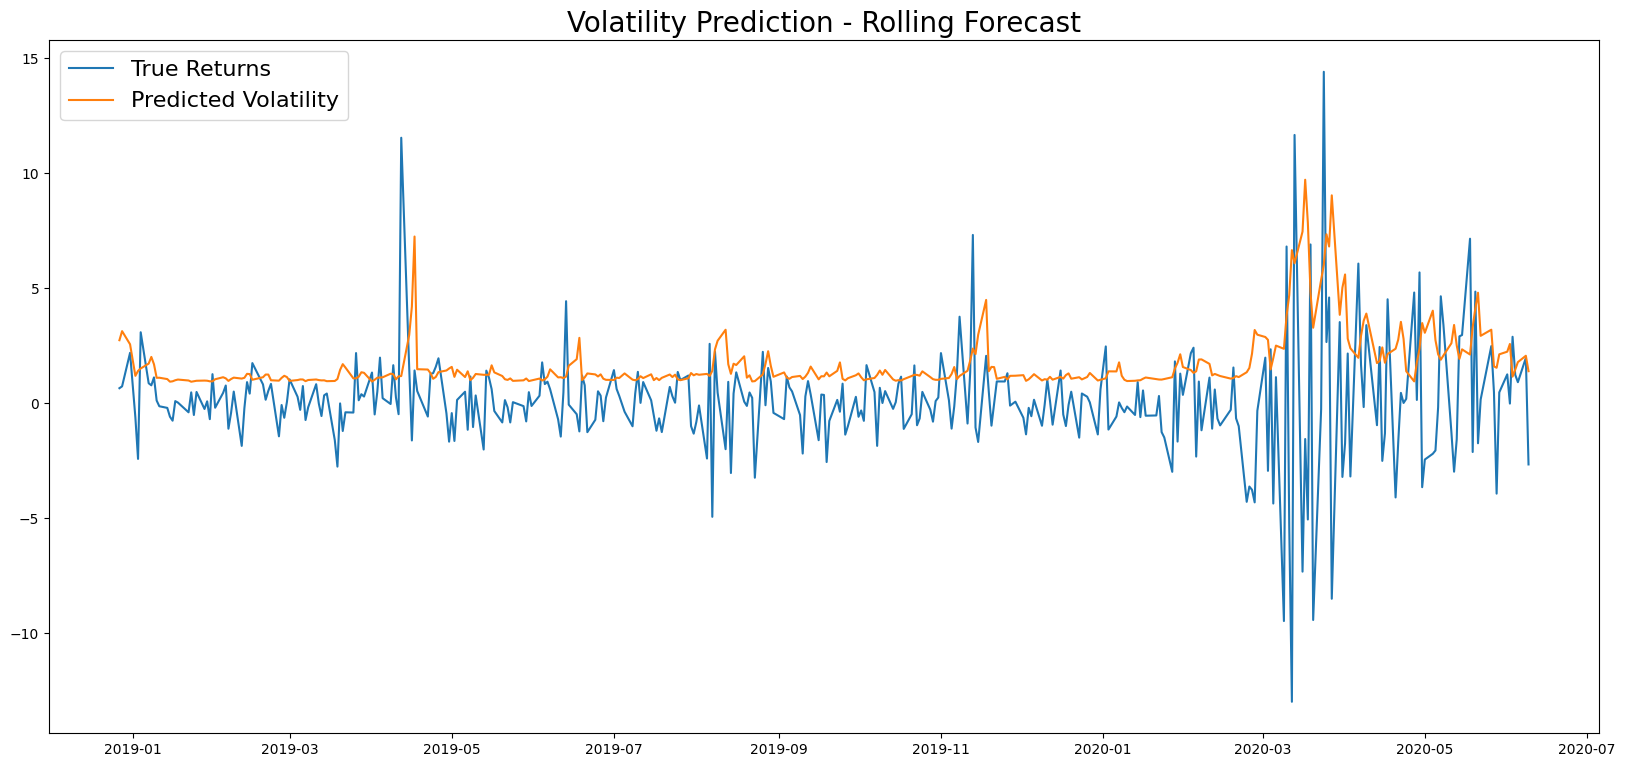

In [58]:
plt.figure(figsize=(20,9))
true, = plt.plot(data['Returns'][-365:]*100)
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

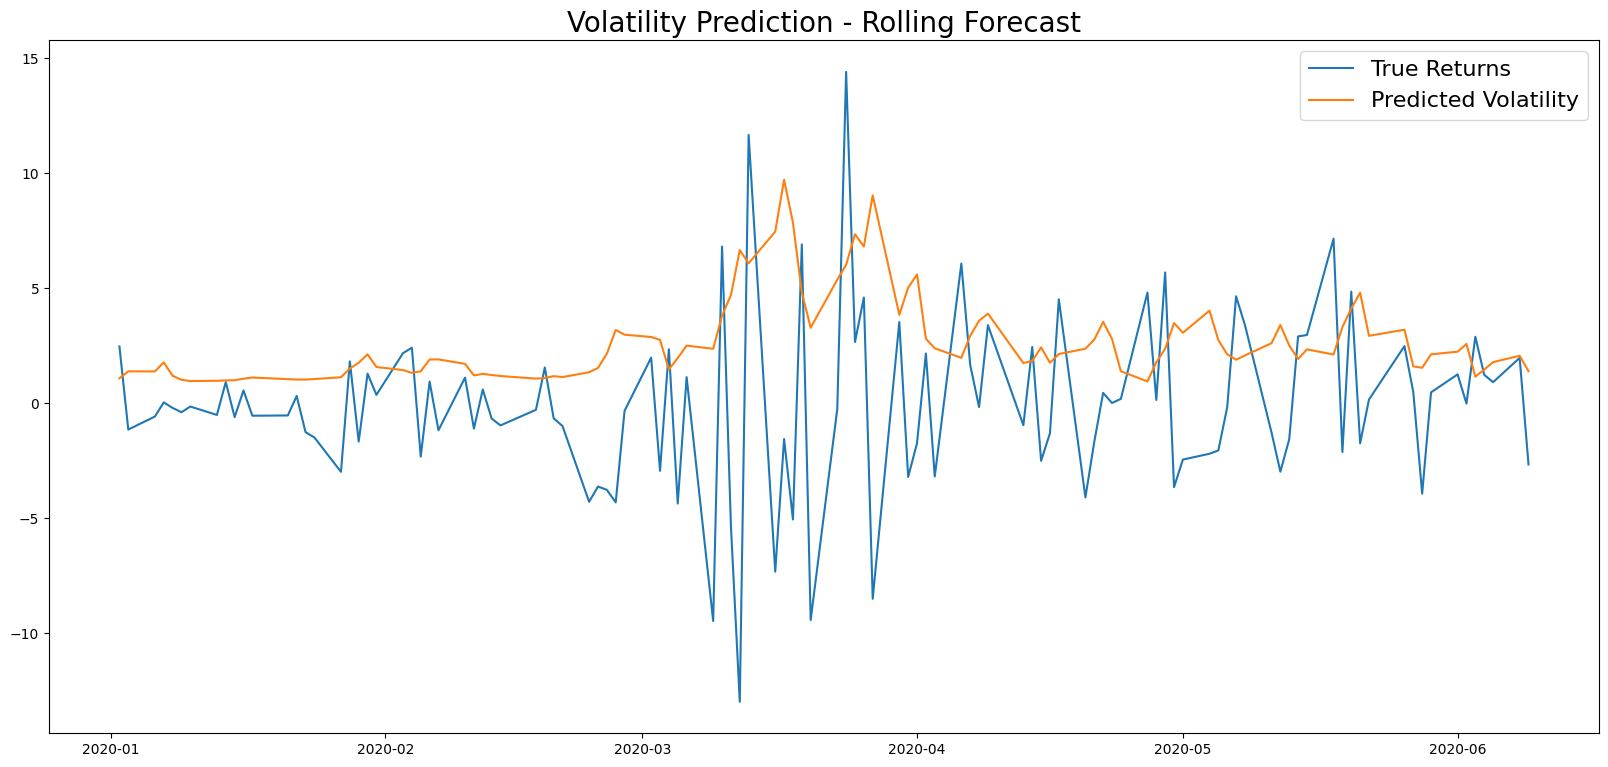

In [59]:
# Zooming in on 2020

plt.figure(figsize=(20,9))
true, = plt.plot(data['Returns']['2020']*100)
preds, = plt.plot(rolling_predictions['2020'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# NVDA Volatility

In [60]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [61]:
start_date = datetime(2010, 1, 1)
end_date = datetime(2024, 1, 1)

In [71]:
nvda = yf.download('NVDA', start=start_date, end=end_date)
nvda.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2010-01-04,0.423923,0.46225,0.4655,0.45275,0.46275,800204000
2010-01-05,0.430113,0.46900,0.4740,0.46050,0.46050,728648000
2010-01-06,0.432864,0.47200,0.4730,0.46425,0.46875,649168000
2010-01-07,0.424381,0.46275,0.4715,0.45925,0.46950,547792000
2010-01-08,0.425298,0.46375,0.4670,0.45625,0.45900,478168000


In [72]:
len(nvda)

3522

In [73]:
# Calculating Daily Return
nvda['Returns'] = nvda['Close'].pct_change()
nvda

Price,Adj Close,Close,High,Low,Open,Volume,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2010-01-04,0.423923,0.462250,0.465500,0.452750,0.462750,800204000,NaN
2010-01-05,0.430113,0.469000,0.474000,0.460500,0.460500,728648000,0.014603
2010-01-06,0.432864,0.472000,0.473000,0.464250,0.468750,649168000,0.006397
2010-01-07,0.424381,0.462750,0.471500,0.459250,0.469500,547792000,-0.019597
2010-01-08,0.425298,0.463750,0.467000,0.456250,0.459000,478168000,0.002161
...,...,...,...,...,...,...,...
2023-12-22,48.816162,48.830002,49.382999,48.466999,49.195000,252507000,-0.003266
2023-12-26,49.265030,49.278999,49.599998,48.959999,48.967999,244200000,0.009195


In [74]:
# drop NaNs
nvda.dropna(inplace=True)

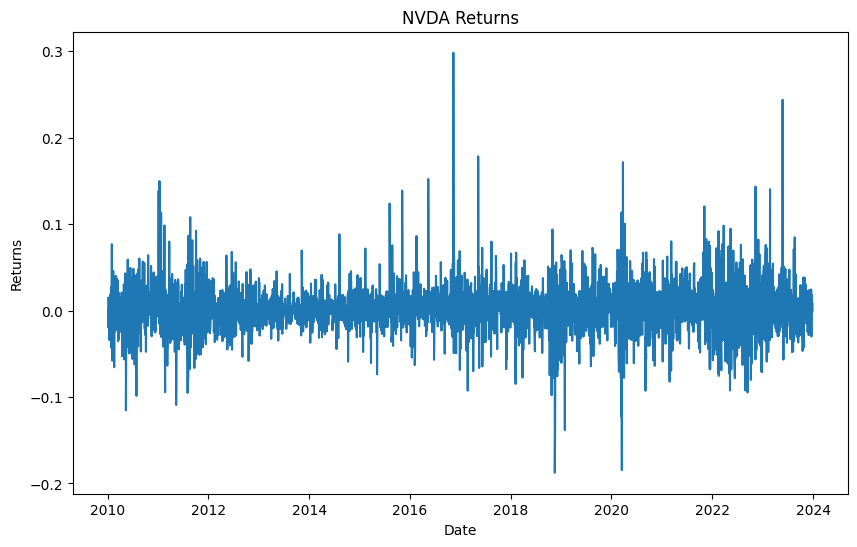

In [75]:
# Plotting Daily Returns
plt.figure(figsize=(10, 6))
plt.plot(nvda['Returns'])
plt.title('NVDA Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [ ]:
# Good candidate for GARCH because we have a lot of sudden 'bursts'

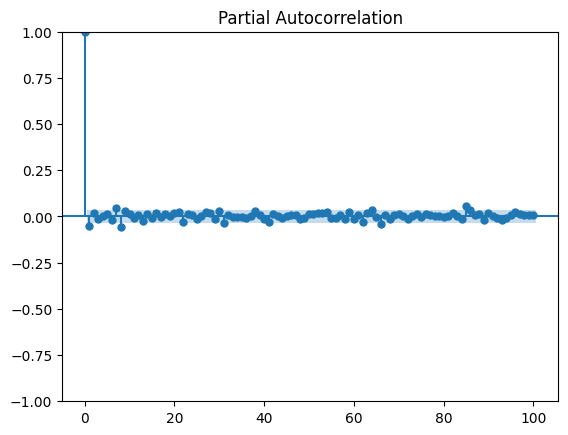

In [88]:
# Plotting PACF to determine the order of the GARCH process
plot_pacf(nvda['Returns'], lags=100)
plt.show()

# Fitting a GARCH(2, 2)

> Add blockquote



In [103]:
# GARCH Model
model = arch_model(nvda['Returns']*100, vol='GARCH', p=2, q=2)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 22133.47578438591
Iteration:      2,   Func. Count:     18,   Neg. LLF: 13677.532631535294
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1539982937.2479405
Iteration:      4,   Func. Count:     35,   Neg. LLF: 8952.42865416186
Iteration:      5,   Func. Count:     43,   Neg. LLF: 8550.244085180186
Iteration:      6,   Func. Count:     51,   Neg. LLF: 8534.597991850604
Iteration:      7,   Func. Count:     59,   Neg. LLF: 8428.767672307044
Iteration:      8,   Func. Count:     67,   Neg. LLF: 8451.14001660996
Iteration:      9,   Func. Count:     75,   Neg. LLF: 8457.754405748106
Iteration:     10,   Func. Count:     83,   Neg. LLF: 8426.053019510615
Iteration:     11,   Func. Count:     91,   Neg. LLF: 8430.330770049204
Iteration:     12,   Func. Count:     99,   Neg. LLF: 8417.769206991736
Iteration:     13,   Func. Count:    107,   Neg. LLF: 8413.512696206912
Iteration:     14,   Func. Count:    114,   Neg. LLF: 8413.19740

# Rolling Predictions (day by day)

In [104]:
# Rolling Predictions (day by day)
rolling_predictions = []
test_size = 365

for i in range(test_size):
  train = nvda['Returns'][:-(test_size-i)]
  model = arch_model(train*100, p=2, q=2)
  model_fit = model.fit(disp='off')
  pred = model_fit.forecast(horizon=1)
  rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions,
                                index=nvda['Returns'].index[-365:])

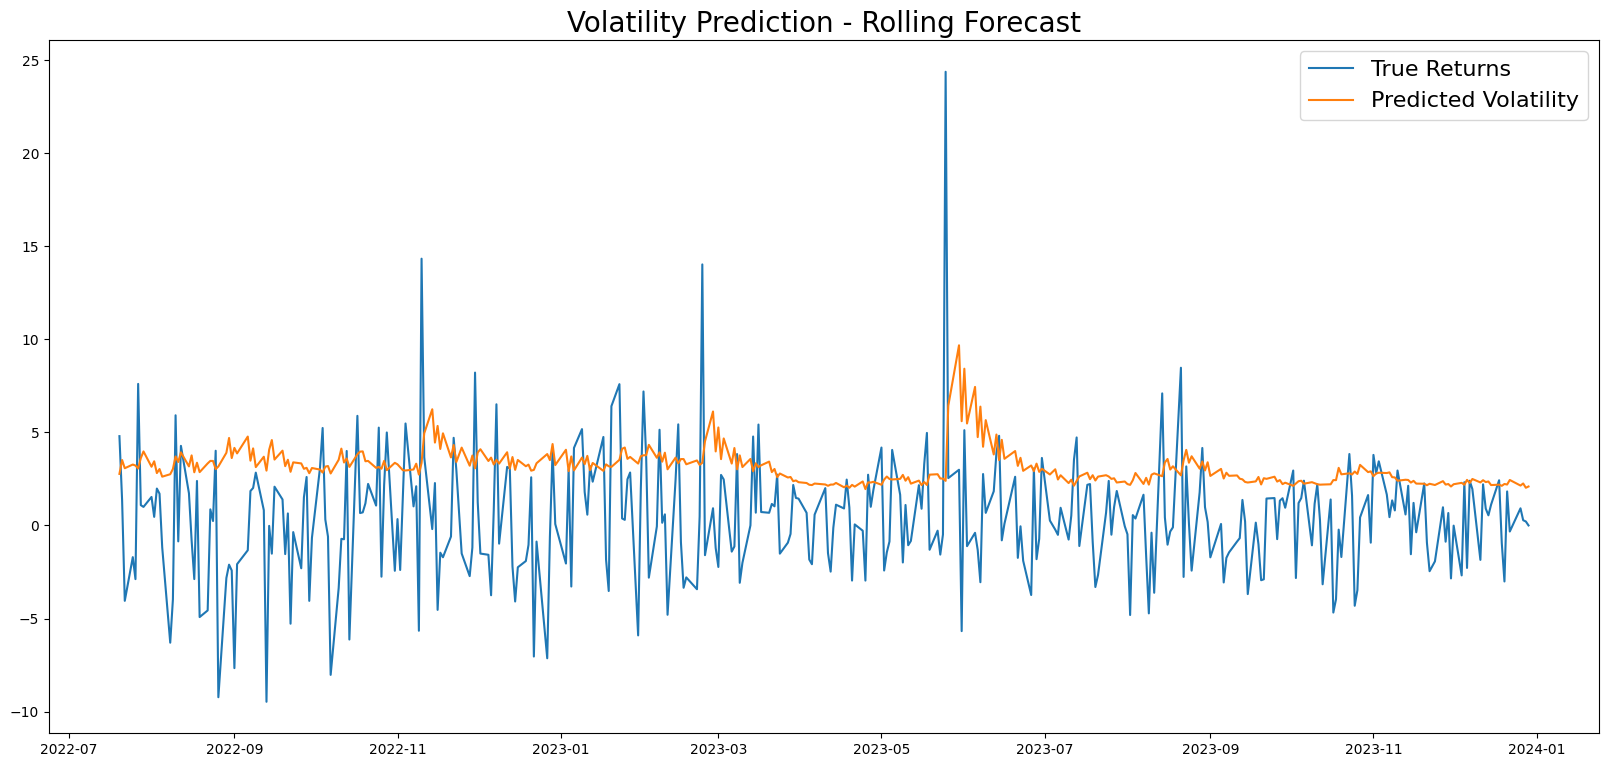

In [105]:
plt.figure(figsize=(20,9))
true, = plt.plot(nvda['Returns'][-365:]*100)
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
plt.show()